In [1]:
from sklearn import datasets
from sklearn import preprocessing

from numpy import where

import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras import optimizers
from matplotlib import pyplot

# What is a Loss Function and Loss?

> The function we want to minimize or maximize is called the objective function or criterion. When we are minimizing it, we may also call it the cost function, loss function, or error function. 
> - Page 82, [Deep Learning](https://www.amazon.com/Deep-Learning-Adaptive-Computation-Machine/dp/0262035618/ref=as_li_ss_tl?_encoding=UTF8&qid=&sr=&linkCode=sl1&tag=inspiredalgor-20&linkId=e4e32749958369afb667e7e4323d65ba&language=en_US), 2016.




# Regression Functions

In [2]:
# generate regression dataset
X, y = datasets.make_regression(n_samples=1000,
                                n_features=20,
                                noise=0.1,
                                random_state=1)

In [3]:
# standardize dataset
X = preprocessing.StandardScaler().fit_transform(X)
y = preprocessing.StandardScaler().fit_transform(y.reshape(len(y), 1))[:, 0]

In [4]:
# split into train and test
n_train = 500
trainX, testX = X[:n_train, :], X[n_train:, :]
trainy, testy = y[:n_train], y[n_train:]

## mean_squared_error

In [5]:
# define model
model = tf.keras.Sequential()
model.add(
    layers.Dense(25,
                 input_dim=20,
                 activation='relu',
                 kernel_initializer='he_uniform'))
model.add(layers.Dense(1, activation='linear'))
opt = optimizers.SGD(lr=0.01, momentum=0.9)
model.compile(loss='mean_squared_error', optimizer=opt, metrics=['mse'])

In [6]:
# fit model
history = model.fit(trainX,
                    trainy,
                    validation_data=(testX, testy),
                    epochs=100,
                    verbose=0)

# evaluate the model
_, train_mse = model.evaluate(trainX, trainy, verbose=0)
_, test_mse = model.evaluate(testX, testy, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_mse, test_mse))

Train: 0.003, Test: 0.007


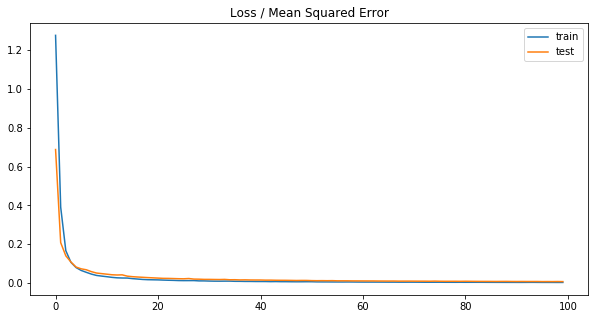

In [7]:
# plot loss during training
fig= pyplot.figure(figsize=(10,5))

pyplot.title('Loss / Mean Squared Error')
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()
pyplot.show()

## mean_squared_logarithmic_error

In [8]:
# define model
model = tf.keras.Sequential()
model.add(
    layers.Dense(25,
                 input_dim=20,
                 activation='relu',
                 kernel_initializer='he_uniform'))
model.add(layers.Dense(1, activation='linear'))
opt = optimizers.SGD(lr=0.01, momentum=0.9)
model.compile(loss='mean_squared_logarithmic_error',
              optimizer=opt,
              metrics=['mse'])

In [9]:
# fit model
history = model.fit(trainX,
                    trainy,
                    validation_data=(testX, testy),
                    epochs=100,
                    verbose=0)

# evaluate the model
_, train_mse = model.evaluate(trainX, trainy, verbose=0)
_, test_mse = model.evaluate(testX, testy, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_mse, test_mse))

W0618 16:49:12.227812 4387722688 deprecation.py:323] From /anaconda3/envs/tf_2.0/lib/python3.7/site-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Train: 0.190, Test: 0.226


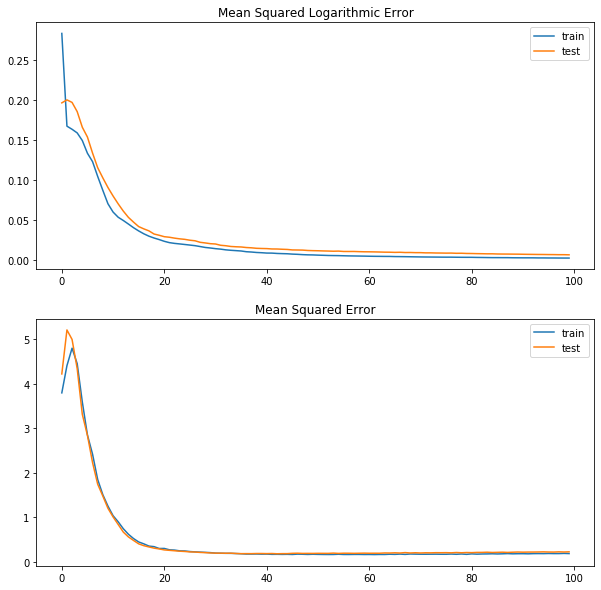

In [10]:
# plot loss during training
fig = pyplot.figure(figsize=(10, 10))

pyplot.subplot(211)
pyplot.title('Mean Squared Logarithmic Error')
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()
# plot mse during training
pyplot.subplot(212)
pyplot.title('Mean Squared Error')
pyplot.plot(history.history['mse'], label='train')
pyplot.plot(history.history['val_mse'], label='test')
pyplot.legend()
pyplot.show()

## mean_absolute_error

In [11]:
# define model
model = tf.keras.Sequential()
model.add(
    layers.Dense(25,
                 input_dim=20,
                 activation='relu',
                 kernel_initializer='he_uniform'))
model.add(layers.Dense(1, activation='linear'))
opt = optimizers.SGD(lr=0.01, momentum=0.9)
model.compile(loss='mean_absolute_error', optimizer=opt, metrics=['mse'])

In [12]:
# fit model
history = model.fit(trainX,
                    trainy,
                    validation_data=(testX, testy),
                    epochs=100,
                    verbose=0)
# evaluate the model
_, train_mse = model.evaluate(trainX, trainy, verbose=0)
_, test_mse = model.evaluate(testX, testy, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_mse, test_mse))

Train: 0.004, Test: 0.009


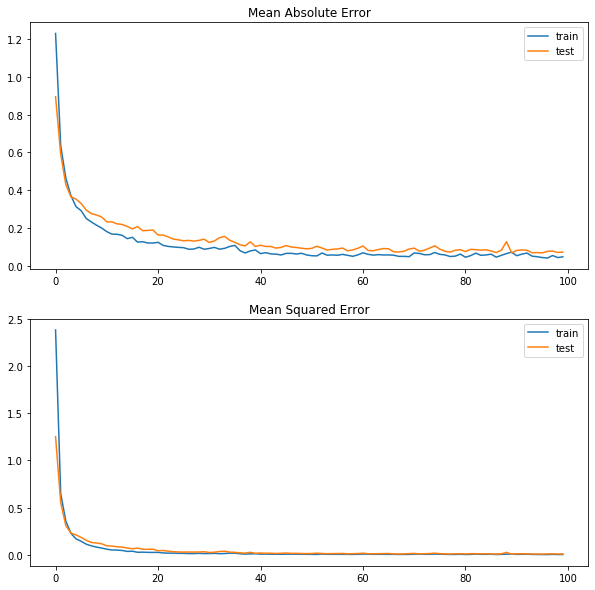

In [13]:
# plot loss during training
fig= pyplot.figure(figsize=(10,10))

pyplot.subplot(211)
pyplot.title('Mean Absolute Error')
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()
# plot mse during training
pyplot.subplot(212)
pyplot.title('Mean Squared Error')
pyplot.plot(history.history['mse'], label='train')
pyplot.plot(history.history['val_mse'], label='test')
pyplot.legend()
pyplot.show()

---

# Binary Classification Loss Functions

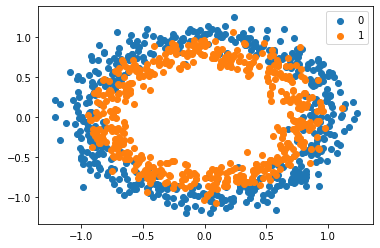

In [14]:
# generate circles
X, y = datasets.make_circles(n_samples=1000, noise=0.1, random_state=1)
# select indices of points with each class label
for i in range(2):
    samples_ix = where(y == i)
    pyplot.scatter(X[samples_ix, 0], X[samples_ix, 1], label=str(i))
pyplot.legend()
pyplot.show()

In [15]:
# split into train and test
n_train = 500
trainX, testX = X[:n_train, :], X[n_train:, :]
trainy, testy = y[:n_train], y[n_train:]

## binary_crossentropy

In [16]:
# define model
model = tf.keras.Sequential()
model.add(
    layers.Dense(50,
                 input_dim=2,
                 activation='relu',
                 kernel_initializer='he_uniform'))
model.add(layers.Dense(1, activation='sigmoid'))

opt = optimizers.SGD(lr=0.01, momentum=0.9)
model.compile(loss='binary_crossentropy', optimizer=opt, metrics=['acc'])

In [17]:
# fit model
history = model.fit(trainX,
                    trainy,
                    validation_data=(testX, testy),
                    epochs=200,
                    verbose=0)

# evaluate the model
_, train_acc = model.evaluate(trainX, trainy, verbose=0)
_, test_acc = model.evaluate(testX, testy, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))

Train: 0.836, Test: 0.844


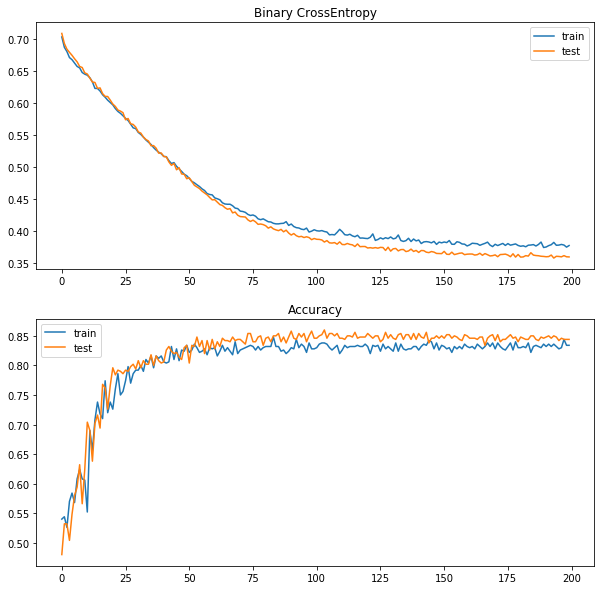

In [18]:
# plot loss during training
fig= pyplot.figure(figsize=(10,10))

pyplot.subplot(211)
pyplot.title('Binary CrossEntropy')
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()
# plot accuracy during training
pyplot.subplot(212)
pyplot.title('Accuracy')
pyplot.plot(history.history['acc'], label='train')
pyplot.plot(history.history['val_acc'], label='test')
pyplot.legend()
pyplot.show()

## hinge

In [19]:
# generate 2d classification dataset
X, y = datasets.make_circles(n_samples=1000, noise=0.1, random_state=1)

# change y from {0,1} to {-1,1}
y[where(y == 0)] = -1

# split into train and test
n_train = 500
trainX, testX = X[:n_train, :], X[n_train:, :]
trainy, testy = y[:n_train], y[n_train:]

In [20]:
# define model
model = tf.keras.Sequential()
model.add(
    layers.Dense(50,
                 input_dim=2,
                 activation='relu',
                 kernel_initializer='he_uniform'))
model.add(layers.Dense(1, activation='sigmoid'))

opt = optimizers.SGD(lr=0.01, momentum=0.9)
model.compile(loss='hinge', optimizer=opt, metrics=['acc'])

In [21]:
# fit model
history = model.fit(trainX,
                    trainy,
                    validation_data=(testX, testy),
                    epochs=200,
                    verbose=0)

# evaluate the model
_, train_acc = model.evaluate(trainX, trainy, verbose=0)
_, test_acc = model.evaluate(testX, testy, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))

Train: 0.420, Test: 0.430


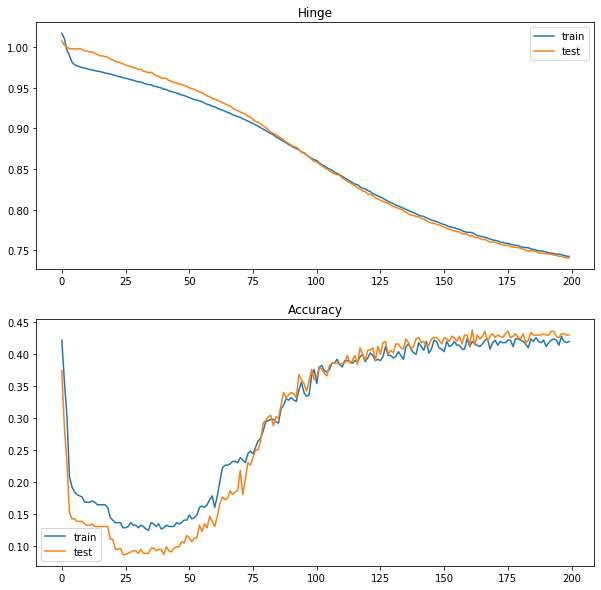

In [22]:
# plot loss during training
fig= pyplot.figure(figsize=(10,10))

pyplot.subplot(211)
pyplot.title('Hinge')
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()
# plot accuracy during training
pyplot.subplot(212)
pyplot.title('Accuracy')
pyplot.plot(history.history['acc'], label='train')
pyplot.plot(history.history['val_acc'], label='test')
pyplot.legend()
pyplot.show()

## squared_hinge

In [23]:
# define model
model = tf.keras.Sequential()
model.add(
    layers.Dense(50,
                 input_dim=2,
                 activation='relu',
                 kernel_initializer='he_uniform'))
model.add(layers.Dense(1, activation='sigmoid'))

opt = optimizers.SGD(lr=0.01, momentum=0.9)
model.compile(loss='squared_hinge', optimizer=opt, metrics=['acc'])

In [24]:
# fit model
history = model.fit(trainX,
                    trainy,
                    validation_data=(testX, testy),
                    epochs=200,
                    verbose=0)

# evaluate the model
_, train_acc = model.evaluate(trainX, trainy, verbose=0)
_, test_acc = model.evaluate(testX, testy, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))

Train: 0.278, Test: 0.288


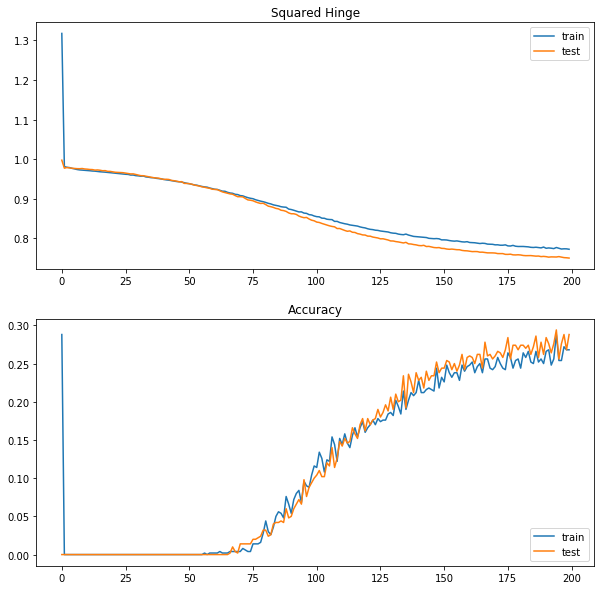

In [25]:
# plot loss during training
fig= pyplot.figure(figsize=(10,10))

pyplot.subplot(211)
pyplot.title('Squared Hinge')
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()
# plot accuracy during training
pyplot.subplot(212)
pyplot.title('Accuracy')
pyplot.plot(history.history['acc'], label='train')
pyplot.plot(history.history['val_acc'], label='test')
pyplot.legend()
pyplot.show()

---

# Multi-Class Classification Loss Functions

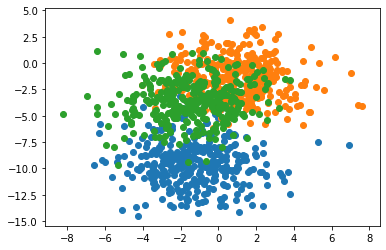

In [26]:
# generate dataset
X, y = datasets.make_blobs(n_samples=1000,
                           centers=3,
                           n_features=2,
                           cluster_std=2,
                           random_state=2)

# select indices of points with each class label
for i in range(3):
    samples_ix = where(y == i)
    pyplot.scatter(X[samples_ix, 0], X[samples_ix, 1])
pyplot.show()

In [27]:
# one hot encode output variable
y = tf.keras.utils.to_categorical(y)

In [28]:
# split into train and test
n_train = 500
trainX, testX = X[:n_train, :], X[n_train:, :]
trainy, testy = y[:n_train], y[n_train:]

## categorical_crossentropy

In [29]:
# define model
model = tf.keras.Sequential()
model.add(
    layers.Dense(50,
                 input_dim=2,
                 activation='relu',
                 kernel_initializer='he_uniform'))
model.add(layers.Dense(3, activation='softmax'))
# compile model
opt = optimizers.SGD(lr=0.01, momentum=0.9)
model.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['acc'])

In [30]:
# fit model
history = model.fit(trainX,
                    trainy,
                    validation_data=(testX, testy),
                    epochs=100,
                    verbose=0)
# evaluate the model
_, train_acc = model.evaluate(trainX, trainy, verbose=0)
_, test_acc = model.evaluate(testX, testy, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))

Train: 0.828, Test: 0.814


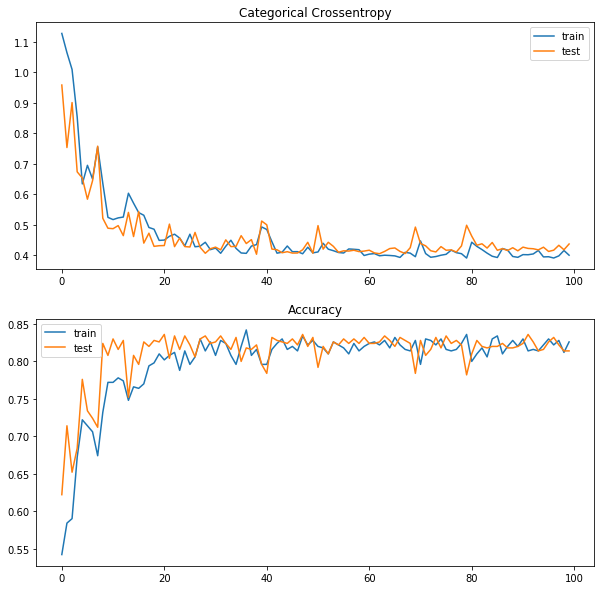

In [31]:
# plot loss during training
fig= pyplot.figure(figsize=(10,10))

pyplot.subplot(211)
pyplot.title('Categorical Crossentropy')
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()
# plot accuracy during training
pyplot.subplot(212)
pyplot.title('Accuracy')
pyplot.plot(history.history['acc'], label='train')
pyplot.plot(history.history['val_acc'], label='test')
pyplot.legend()
pyplot.show()

## sparse_categorical_crossentropy

In [32]:
# generate dataset
X, y = datasets.make_blobs(n_samples=1000,
                           centers=3,
                           n_features=2,
                           cluster_std=2,
                           random_state=2)

# split into train and test
n_train = 500
trainX, testX = X[:n_train, :], X[n_train:, :]
trainy, testy = y[:n_train], y[n_train:]

In [33]:
# define model
model = tf.keras.Sequential()
model.add(
    layers.Dense(50,
                 input_dim=2,
                 activation='relu',
                 kernel_initializer='he_uniform'))
model.add(layers.Dense(3, activation='softmax'))
# compile model
opt = optimizers.SGD(lr=0.01, momentum=0.9)
model.compile(loss='sparse_categorical_crossentropy',
              optimizer=opt,
              metrics=['acc'])

In [34]:
# fit model
history = model.fit(trainX,
                    trainy,
                    validation_data=(testX, testy),
                    epochs=100,
                    verbose=0)
# evaluate the model
_, train_acc = model.evaluate(trainX, trainy, verbose=0)
_, test_acc = model.evaluate(testX, testy, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))

Train: 0.834, Test: 0.816


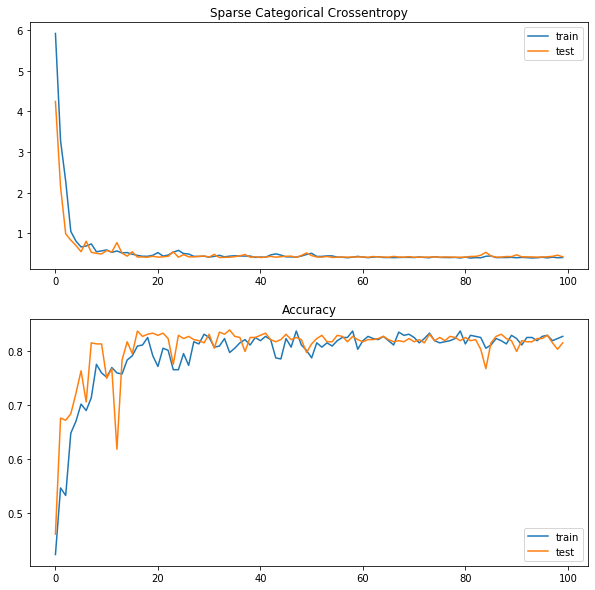

In [35]:
# plot loss during training
fig= pyplot.figure(figsize=(10,10))

pyplot.subplot(211)
pyplot.title('Sparse Categorical Crossentropy')
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()
# plot accuracy during training
pyplot.subplot(212)
pyplot.title('Accuracy')
pyplot.plot(history.history['acc'], label='train')
pyplot.plot(history.history['val_acc'], label='test')
pyplot.legend()
pyplot.show()

## kullback_leibler_divergence

In [36]:
# generate dataset
X, y = datasets.make_blobs(n_samples=1000,
                           centers=3,
                           n_features=2,
                           cluster_std=2,
                           random_state=2)

# one hot encode output variable
y = tf.keras.utils.to_categorical(y)

# split into train and test
n_train = 500
trainX, testX = X[:n_train, :], X[n_train:, :]
trainy, testy = y[:n_train], y[n_train:]

In [37]:
# define model
model = tf.keras.Sequential()
model.add(
    layers.Dense(50,
                 input_dim=2,
                 activation='relu',
                 kernel_initializer='he_uniform'))
model.add(layers.Dense(3, activation='softmax'))
# compile model
opt = optimizers.SGD(lr=0.01, momentum=0.9)
model.compile(loss='kullback_leibler_divergence',
              optimizer=opt,
              metrics=['acc'])

In [38]:
# fit model
history = model.fit(trainX,
                    trainy,
                    validation_data=(testX, testy),
                    epochs=100,
                    verbose=0)
# evaluate the model
_, train_acc = model.evaluate(trainX, trainy, verbose=0)
_, test_acc = model.evaluate(testX, testy, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))

Train: 0.814, Test: 0.812


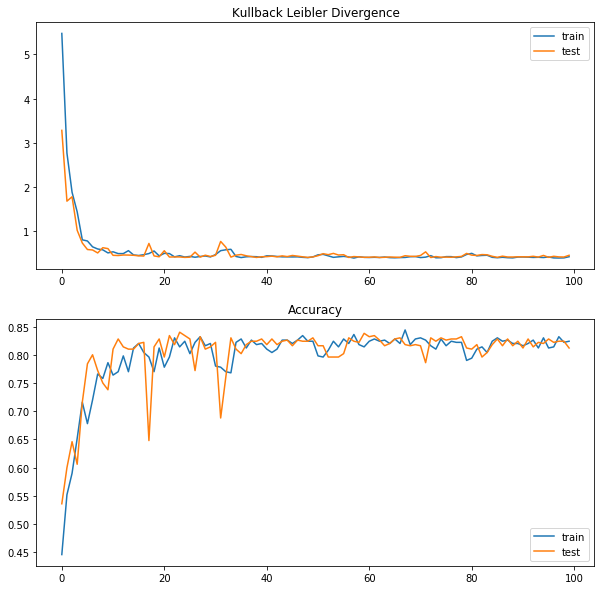

In [39]:
# plot loss during training
fig= pyplot.figure(figsize=(10,10))

pyplot.subplot(211)
pyplot.title('Kullback Leibler Divergence')
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()
# plot accuracy during training
pyplot.subplot(212)
pyplot.title('Accuracy')
pyplot.plot(history.history['acc'], label='train')
pyplot.plot(history.history['val_acc'], label='test')
pyplot.legend()
pyplot.show()

---

Reference:  
- [MACHINE LEARNING MASTERY - Loss and Loss Functions for Training Deep Learning Neural Networks](https://machinelearningmastery.com/loss-and-loss-functions-for-training-deep-learning-neural-networks/)
- [MACHINE LEARNING MASTERY - How to Choose Loss Functions When Training Deep Learning Neural Networks](https://machinelearningmastery.com/how-to-choose-loss-functions-when-training-deep-learning-neural-networks/)